# CUSTOMER SEGMENTATION - RFM ANALYSIS

## Business Problem 


Bir e-ticaret şirketi müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.

Buna yönelik olarak müşterilerin davranışlarını tanımlayacağız ve bu davranışlarda öbeklenmelere göre gruplar oluşturacağız.

Yani ortak davranışlar sergileyenleri aynı gruplara alacağız ve bu gruplara özel satış ve pazarlama teknikleri geliştirmeye çalışacağız.

**Veri Seti Hikayesi**

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor.

Bu şirket hediyelik eşya satıyor. Promosyon ürünleri gibi düşünebilir.

Müşterilerinin çoğu da toptancı.

**Değişkenler**

- Invoice: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.
- StockCode: Ürün kodu. Her bir ürün için eşsiz numara.
- Description: Ürün ismi
- Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.
- InvoiceDate: Fatura tarihi ve zamanı. 
- Price: Ürün fiyatı (Sterlin cinsinden)
- CustomerID: Eşsiz müşteri numarası
- Country: Ülke ismi. Müşterinin yaşadığı ülke.



## DATA UNDERSTANDING 

* Import işlemleri

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Tüm sutünları ve satırları gözlemlemek için kullanılan kod.
pd.set_option('display.max_columns',None); 
pd.set_option("display.max_rows",None);
pd.set_option("display.float_format",lambda x:"%.2f" % x) #ondalık sayılarda virgülden sonra gösterilecek basamak sayısı.

* Datayı okuma

In [3]:
df_2010_2011 = pd.read_excel("online_retail.xlsx", sheet_name = "Year 2010-2011")

In [4]:
df = df_2010_2011.copy()

In [5]:
#Veri setinin ilk 5 gözlemi
df.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


## DATA PREPROCESSING

* Yapısal bilgiler

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* Boyut sayısı

In [7]:
df.shape 

(541910, 8)

* Betimsel istatistik

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.00,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.00
Price,541910.00,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.00
Customer ID,406830.00,15287.68,1713.60,12346.00,13953.00,15152.00,16791.00,18287.00


In [9]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T 

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,541910.00,9.55,218.08,-80995.00,-2.00,1.00,1.00,1.00,3.00,10.00,24.00,29.00,100.00,80995.00
Price,541910.00,4.61,96.76,-11062.06,0.19,0.42,0.63,1.25,2.08,4.13,7.95,9.95,18.00,38970.00
Customer ID,406830.00,15287.68,1713.60,12346.00,12415.00,12626.00,12876.00,13953.00,15152.00,16791.00,17719.00,17905.00,18212.00,18287.00


* Eksik değerler

In [10]:
#Veri setinde hiç eksik değer var mı?
df.isnull().values.any()

True

In [11]:
#Veri setindeki her bir değişkenden kaçar tane eksik gözlem var?
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [12]:
#Veri setindeki eskik (NaN) değerlerden kurtulduk.(Veri seti Customer ID ve Description değişkenlerinde NaN değerlere sahip)
df.dropna(inplace = True)

In [13]:
df.isnull().values.any()

False

* Aykırı Değerler

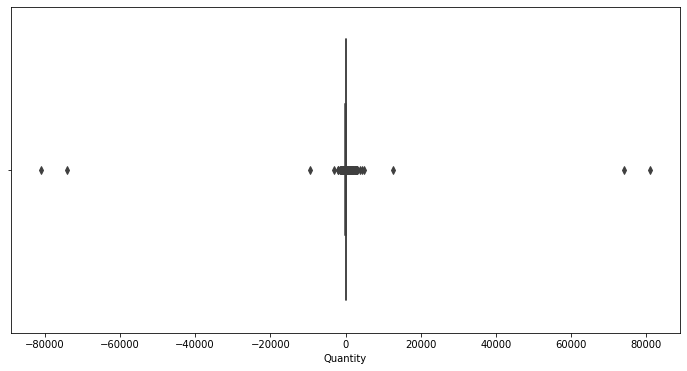

In [18]:
#Quantity değişkeninin aykırı değerleri boxplot yöntemiyle gözlemlenmiştir.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.boxplot(x = df['Quantity']);

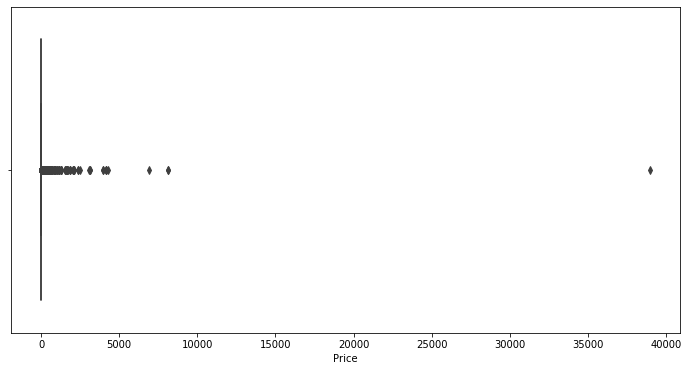

In [19]:
#Price değişkeninin aykırı değerleri boxplot yöntemiyle gözlemlenmiştir.
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Price']);

In [21]:
#Aykırı gözlemde 1. ve 3. çeyreklikler göz önüne alınarak IQR hesaplanır ve alt, üst sınırlar burada belirlenir. Bu sınırların dışında kalan değerler aykırı sayılır. 

for feature in ["Quantity","Price"]:
    Q1=df[feature].quantile(0.01)
    Q3=df[feature].quantile(0.99)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    
    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature,"no")
        
    df = df[~((df[feature] > upper) | (df[feature] < lower))] #Bu kod ile aykırı değerler ele alınmamış silinmiş olarak kabul edilmiştir.

    #Quantity vePrice değişkenlerinde aykırı değer olduğu sonucu ortaya çıkmaktadır. Bu sebeple çıktıda yes yazmaktadır. 

Quantity yes
Price no


In [22]:
len(df[((df[feature] > upper) | (df[feature] < lower))])

0

## Veri setiyle ilgili sorular - Pandas Alıştırması

* En çok iade alan ürünler hangileridir ?

In [23]:
df[df["Invoice"].astype(str).str.startswith("C")].sort_values("Quantity").head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
352771,C567685,23004,TRAVEL CARD WALLET PANTRY,-152,2011-09-21 16:35:00,0.42,16394.00,United Kingdom
43663,C540109,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,-150,2011-01-04 17:12:00,2.95,17389.00,United Kingdom
309359,C564081,22423,REGENCY CAKESTAND 3 TIER,-150,2011-08-22 17:10:00,10.95,17949.00,United Kingdom
320582,C565044,21479,WHITE SKULL HOT WATER BOTTLE,-144,2011-08-31 17:02:00,3.39,12931.00,United Kingdom
240225,C558095,23210,WHITE ROCKING HORSE HAND PAINTED,-144,2011-06-26 13:13:00,1.04,15046.00,United Kingdom


##### Quantity değerlerinde eksilerin olmasının sebebi iade olan ürünlerdir.  Bu ürünler fatura numarasında C ile başlayanlardı. Bunları tablodan silmeliyiz.  

In [24]:
df=df[~df["Invoice"].astype(str).str.startswith("C")] 

In [25]:
df.sort_values("Quantity",ascending=False).tail() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
227742,556905,20622,VIPPASSPORT COVER,1,2011-06-15 13:05:00,2.10,16904.00,United Kingdom
448745,575070,22120,WELCOME WOODEN BLOCK LETTERS,1,2011-11-08 12:58:00,9.95,17841.00,United Kingdom
448744,575070,21876,POTTERING MUG,1,2011-11-08 12:58:00,1.65,17841.00,United Kingdom
227743,556905,23091,ZINC HERB GARDEN CONTAINER,1,2011-06-15 13:05:00,6.25,16904.00,United Kingdom
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.00,France


In [26]:
#Customer ID'lerin float şeklinde olması hoş gözükmüyor. Integer dönüşümü yapmalıyız.
df["Customer ID"]=df["Customer ID"].astype(int)

* Eşsiz ürün sayısı

In [27]:
df["Description"].nunique()

3861

* Eşsiz ürünlerin her birinden kaç tane var?

In [28]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2015
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1598
ASSORTED COLOUR BIRD ORNAMENT         1404
PARTY BUNTING                         1397
Name: Description, dtype: int64

* En çok sipariş edilen ürün hangisidir?

In [29]:
df.groupby("Description").agg({"Quantity":"sum"}).head()  

,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,140
50'S CHRISTMAS GIFT BAG LARGE,1485
DOLLY GIRL BEAKER,1598
I LOVE LONDON MINI BACKPACK,360
I LOVE LONDON MINI RUCKSACK,1


In [30]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head() 

,Quantity
Description,
JUMBO BAG RED RETROSPOT,37411
ASSORTED COLOUR BIRD ORNAMENT,29994
WHITE HANGING HEART T-LIGHT HOLDER,27167
PACK OF 72 RETROSPOT CAKE CASES,25533
WORLD WAR 2 GLIDERS ASSTD DESIGNS,25327


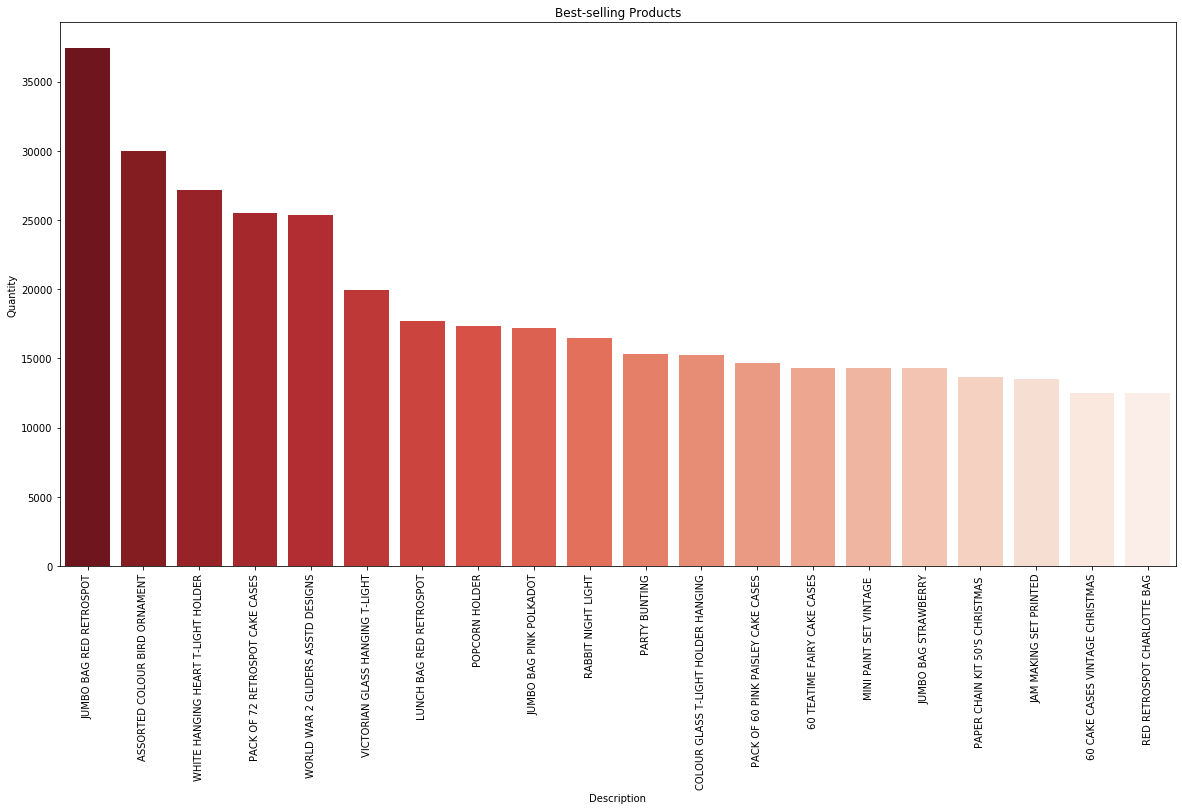

In [31]:
products_incomes = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).iloc[0:20]

plt.figure(figsize=(20,10))
sns.barplot(products_incomes.index, products_incomes.values, palette="Reds_r")
plt.ylabel("Quantity")
plt.title("Best-selling Products");
plt.xticks(rotation=90);

* En az sipariş edilen ürün hangisidir?

In [32]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).tail() 

,Quantity
Description,
NECKLACE+BRACELET SET PINK DAISY,1
BLUE PADDED SOFT MOBILE,1
BLUE NEW BAROQUE FLOCK CANDLESTICK,1
BLUE LEAVES AND BEADS PHONE CHARM,1
FRYING PAN RED POLKADOT,1


* Toplam kaç fatura kesilmiştir?

In [33]:
df["Invoice"].nunique()

18252

* Fatura başına ortalama toplam tutar nedir?

In [34]:
df["TotalPrice"] = df["Quantity"]*df["Price"]
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


* En pahalı ürünler hangisi?

In [35]:
df.sort_values("Price",ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
279831,561368,POST,POSTAGE,1,2011-07-26 16:00:00,36.50,14866,United Kingdom,36.50
200711,554151,22824,3 TIER SWEETHEART GARDEN SHELF,1,2011-05-23 11:07:00,35.95,14049,United Kingdom,35.95
200393,554131,22824,3 TIER SWEETHEART GARDEN SHELF,2,2011-05-23 09:43:00,35.95,13988,United Kingdom,71.90
304722,563613,22824,3 TIER SWEETHEART GARDEN SHELF,1,2011-08-18 08:49:00,35.95,12688,Israel,35.95
170944,551352,22824,3 TIER SWEETHEART GARDEN SHELF,2,2011-04-28 10:20:00,35.95,16637,United Kingdom,71.90


* Hangi ülkeden kac adet siparis geldi ?

In [36]:
df["Country"].value_counts()

United Kingdom          352991
Germany                   9023
France                    8328
EIRE                      7104
Spain                     2476
Netherlands               2255
Belgium                   2029
Switzerland               1811
Portugal                  1456
Australia                 1141
Norway                    1050
Italy                      751
Channel Islands            743
Finland                    649
Cyprus                     602
Sweden                     402
Austria                    384
Denmark                    378
Poland                     324
Japan                      301
Israel                     246
Unspecified                244
Singapore                  212
Iceland                    182
USA                        179
Canada                     148
Greece                     141
Malta                      109
United Arab Emirates        67
European Community          60
RSA                         58
Lebanon                     45
Lithuani

* Hangi ülke ne kadar kazandırdı?

In [37]:
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice",ascending=False).head()

,TotalPrice
Country,
United Kingdom,6247758.59
EIRE,245090.32
Netherlands,239456.51
Germany,224210.83
France,194277.23


## RFM Skorları ile Müşteri Segmentasyonu 


Recency, Frequency, Monetary ifadelerinin baş harflerinden oluşur.

Müşterilerin satın alma alışkanlıkları üzerinden pazarlama ve satış stratejileri belirlemeye yardımcı olan bir tekniktir.

* Recency (yenilik): Müşterinin son satın almasından bugüne kadar geçen süre

-- Diğer bir ifadesiyle “Müşterinin son temasından bugüne kadar geçen süre” dir.

-- Bugünün tarihi - Son satın alma

-- Örnek verecek olursak bugün bu analizi yapıyorsak bugünün tarihi - son ürün satın alma tarihi.

-- Bu örneğin 20 olabilir 100 olabilir. Biliriz ki 20 olan müşteri daha sıcaktır. Daha son zamanlarda bizimle teması olmuştur.

* Frequency (Sıklık): Toplam satın alma sayısı.

* Monetary (Parasal Değer): Müşterinin yaptığı toplam harcama.

In [38]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [39]:
# Customer ID değişkeni stringe dönüştürülmüştür.
df["Customer ID"]=df["Customer ID"].astype(int)

### Recency

##### Veri seti için belirlenen bugün tarihi ile müşterimizin son alışveriş tarihi arasındaki farkı hesaplar.

In [40]:
#Alışverişin yapıldığı ilk gün
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [41]:
#Alışverişin yapıldığı son gün
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [42]:
# Veri setinin yapısına göre bugünün tarihini belirlemeliyiz. Veri setindeki max tarih analizin yapıldığı gün kabul edilebilir.
import datetime as dt   
today_date=dt.datetime(2011,12,9)
today_date 

datetime.datetime(2011, 12, 9, 0, 0)

In [43]:
#Her bir müşterinin son satın alma tarihleri
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head() 

,InvoiceDate
Customer ID,
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00
12352,2011-11-03 14:37:00


In [44]:
# Analizin yapıldığı gün - Son alışveriş yapılan tarih işlemi yapıldığında recency değerini bulduk.
temp_df=(today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))
temp_df.head()

,InvoiceDate
Customer ID,
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00
12352,35 days 09:23:00


In [45]:
#InvoiceDate sütunun adı Receny olarak değiştirildi.
temp_df.rename(columns={"InvoiceDate":"Recency"},inplace=True)
temp_df.head()

,Recency
Customer ID,
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00
12352,35 days 09:23:00


In [46]:
#Her bir değerin sadece günleri alındı.
recency_df=temp_df["Recency"].apply(lambda x:x.days)
recency_df.head()

Customer ID
12347      1
12348     74
12349     17
12350    309
12352     35
Name: Recency, dtype: int64

### Frequency

##### Her bir müşterinin sıklık değerleri

In [47]:
#Customer ID ve Invoice e göre gruplama yapılıp invoice değişkenin sayısı bulundu.
temp_df=df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
temp_df.head()

Invoice
Customer ID Invoice         
12347       537626        31
            542237        29
            549222        24
            556201        18
            562032        22

In [48]:
temp_df.groupby("Customer ID").agg({"Invoice":"sum"}).head()

,Invoice
Customer ID,
12347,182
12348,27
12349,71
12350,16
12352,77


In [49]:
#Invoice sütunun adı Frequency olarak değiştirildi.
freq_df=temp_df=df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice":"Frequency"},inplace=True)
freq_df.head()

,Frequency
Customer ID,
12347,182
12348,27
12349,71
12350,16
12352,77


## Monetary

##### Müşterinin yaptığı toplam harcama.

In [50]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [51]:
#Customer ID e göre gruplandırıp TotalPrice toplamını bulduk.
monetary_df=df.groupby(["Customer ID"]).agg({"TotalPrice":"sum"})
monetary_df.head()

,TotalPrice
Customer ID,
12347,4310.00
12348,1437.24
12349,1417.60
12350,294.40
12352,1385.74


In [52]:
#TotalPrice sütunun adı Monetary olarak değiştirilmiştir.
monetary_df.rename(columns={"TotalPrice":"Monetary"},inplace=True)
monetary_df.head()

,Monetary
Customer ID,
12347,4310.00
12348,1437.24
12349,1417.60
12350,294.40
12352,1385.74


## Recency, Frequency ve Monetary tablolarını tek tablo haline getirme

* Tabloların boyutlarına bakma

In [53]:
print(recency_df.shape,freq_df.shape,monetary_df.shape)

(4310,) (4310, 1) (4310, 1)


* Tabloların birleşimi

In [54]:
# Hepsinde customer ID ortak lduğunda customer ID yi index algıladı
rfm = pd.concat([recency_df,freq_df,monetary_df], axis=1)
rfm.head(10)

,Recency,Frequency,Monetary
Customer ID,,,
12347,1,182,4310.00
12348,74,27,1437.24
12349,17,71,1417.60
12350,309,16,294.40
12352,35,77,1385.74
12353,203,4,89.00
12354,231,58,1079.40
12355,213,13,459.40
12356,21,59,2811.43


* Bulunan değerlerin standartlaştırılmış halini elde edip değerleri skora dönüştürmeliyiz.

In [55]:
# "qcut" quartile değerlerine göre bölme yapar.
rfm["RecencyScore"]=pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])  #Recency de küçük olan iyiyken monetary ve frequency de büyük olanlar iyidir.

In [56]:
rfm["FrequencyScore"]=pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])

In [57]:
rfm["MonetaryScore"]=pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

In [58]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12347,1,182,4310.00,5,5,5
12348,74,27,1437.24,2,2,4
12349,17,71,1417.60,4,4,4
12350,309,16,294.40,1,2,2
12352,35,77,1385.74,3,4,4


In [59]:
(rfm["RecencyScore"].astype(str)+ rfm["FrequencyScore"].astype(str)+ rfm["MonetaryScore"].astype(str)).head()

Customer ID
12347    555
12348    224
12349    444
12350    122
12352    344
dtype: object

In [60]:
rfm["RFM_SCORE"]=rfm["RecencyScore"].astype(str)+rfm["FrequencyScore"].astype(str)+rfm["MonetaryScore"].astype(str)

In [61]:
#Tabloda en iyi olan müşteriler (Champions)
rfm[rfm["RFM_SCORE"]=="555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12347,1,182,4310.00,5,5,5,555
12362,2,266,5226.23,5,5,5,555
12417,2,192,3649.10,5,5,5,555
12433,-1,420,13375.87,5,5,5,555
12437,0,200,4951.41,5,5,5,555


In [62]:
#Tabloda en kötü müşteriler
rfm[rfm["RFM_SCORE"]=="111"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12353,203,4,89.00,1,1,1,111
12361,286,10,189.90,1,1,1,111
12401,302,5,84.30,1,1,1,111
12402,322,11,225.60,1,1,1,111
12441,365,11,173.55,1,1,1,111


In [63]:
#en iyi ve en kötü müşterilerin doğruluğuna bakabiliriz.
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4310.00,91.17,100.05,-1.00,16.00,49.00,141.00,372.00
Frequency,4310.00,91.88,228.25,1.00,17.00,41.00,100.00,7830.00
Monetary,4310.00,1781.64,6402.03,2.90,300.44,657.57,1607.56,234256.14


* Müşterileri segmentlere ayırma

In [64]:
#Burada rfm skorlarına göre segmentler atanmaktadır. 
#Örnek olarak Hibernating sınıfı şu skor değerlerine sahiptir. 
#r'[1-2][1-2]':'Hibernating' = İlk bölüm R yi ikinci kısım F yi ifade etmektedir. R de 1-2, F de 1-2 görürsen Hibernating yaz demek. 
#Buraya sadece Recency ve Frequency eklenmesinin sebebi tabloda sadece bu iki parametre yer aldığı için ancak Monetary de yanlarına eklenebilir.

seg_map={
    r'[1-2][1-2]':'Hibernating',
    r'[1-2][3-4]':'At Risk',
    r'[1-2]5':'Can \t Loose',
    r'33':'Need Attention',
    r'[3-4][4-5]':'Loyal Customers',
    r'41':'Promising',
    r'51':'New Customers',
    r'[4-5][2-3]':'Potential Loyalists',
    r'5[4-5]':'Champions'
}

In [65]:
rfm['Segment']=rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment']=rfm['Segment'].replace(seg_map,regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12347,1,182,4310.00,5,5,5,555,Champions
12348,74,27,1437.24,2,2,4,224,Hibernating
12349,17,71,1417.60,4,4,4,444,Loyal Customers
12350,309,16,294.40,1,2,2,122,Hibernating
12352,35,77,1385.74,3,4,4,344,Loyal Customers


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


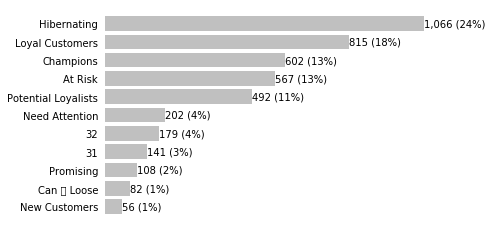

In [66]:
#Segmentler %kaçlık kısmı oluşturmakta.
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Can\'t loose']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [67]:
#Yeni dataFrame oluşturup Customer ID leri atadık.
new_df=pd.DataFrame()
new_df["NewCustomerID"]=rfm[rfm["Segment"]=="New Customers"].index

In [68]:
new_df.head()

,NewCustomerID
0,12367
1,12442
2,12558
3,12587
4,12660


In [69]:
#Hazırladığımız müşteriyi yeni müşteriler adında excel olarak kaydettik.Bu dosya müşteri departmanı ile paylaşılmaya hazır hale gelmiştir.
new_df.to_csv("new_customers.csv")

## Yorumlama

* Segmentler hakkında daha fazla bilgi edinme

In [70]:
rfm[["Segment","Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
31                    51.80   141      8.44   141   319.16   141
32                    50.82   179     22.40   179   540.08   179
At Risk              164.69   567     57.12   567   972.00   567
Can \t Loose         143.90    82    182.85    82  2294.74    82
Champions              4.41   602    289.04   602  6060.20   602
Hibernating          208.45  1066     13.67  1066   350.95  1066
Loyal Customers       32.32   815    156.93   815  2648.56   815
Need Attention        50.92   202     41.80   202   800.45   202
New Customers          5.46    56      7.80    56   318.44    56
Potential Loyalists   14.69   492     34.98   492   823.51   492
Promising             21.66   108      7.97   108   298.92   108

3 farklı segment seçip bunlar üzerinden aksiyon önerileri yapacağım.

* Need Attention Segmenti

Need Attention segmenti incelendiğinde, toplamda 212 müşterimiz bulunmaktadır. Recency ortalaması 51, Frequency ortalaması 42, Monetary yani bıraktığı hesap ortalaması 836 'dır. Need Attention segmenti için promosyonlar,kampanyalar yapılıp müşteriyi elde tutabiliriz.Sadık müşteriler haline getirebiliriz.

* Champions Segmenti

Champions segmenti incelendiğinde, toplamda 608 müşterimiz bulunmaktadır. Recency ortalaması 4, Frequency ortalaması 289, Monetary yani bıraktığı hesap ortalaması 6818 'dir. Champions segmenti için özel bir çabaya ihtiyaç yok. Bu sınıfta en iyi müşteriler bulunmaktadır. Bu müşterilerin devamlılığını sağlamak için özel günlerde tebrik kartları gönderilebilir.

* Can't lose them Segmenti

Can't lose them segmenti incelendiğinde, toplamda 81 müşterimiz bulunmaktadır. Recency ortalaması 142, Frequency ortalaması 182, Monetary yani bıraktığı hesap ortalaması 2275 'dir.Bu sınıf bizden en fazla satınalma yapan müşterilerdir. Yüksek gelir sağlamaktadır. Fakat recency düşük. Can't loose them segmenti bizi terkedebilecek bir sınıf. En çok dikkat edilmesi gereken sınıftır. Kaybetmemek için indirimler yapılabilir, alışveriş yapmamalarının sebepleri araştırılabilir.